In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media

from utils import normalize, inspect, plot
from ndarray_ascii import get_nd_ascii

In [2]:
""" Some util functions. """

def p(x, title=None):
    if title is not None:
        print(title, '   shape =', x.shape)
    if isinstance(x, torch.Tensor):
        x = x.numpy()
    print(get_nd_ascii(x))
    print()


def show_tensor(x, max_n_horiz=9, height=75):
    """ Expect x.shape = (B, C, H, W) or (C, H, W) """
    if isinstance(x, torch.Tensor):
        x = torch2np(x)
    if len(x.shape) == 4:
        if max_n_horiz is None:           
            media.show_images(x, border=True, height=height)
        else:
            B = x.shape[0]
            idx = 0
            while idx < B:
                media.show_images(x[idx:idx+max_n_horiz], height=height)
                idx += max_n_horiz
    else:
        media.show_image(torch2np(x), height=height)

In [3]:
# n = 2
# k = 3
# A = np.arange(n**(2*k)).reshape(n**k, n**k)
# print(A.shape)
# # print(A)

In [4]:
# B = A.reshape([n, n**(k-1), n, n**(k-1)]).transpose(0, 2, 1, 3)
# print('B', B)
# print()
# print(B.shape)
# print(B[0,0].shape)
# (B @ B[0, 0].T).shape

In [5]:
s = '''a
b
c'''
print(s.split('\n'))

['a', 'b', 'c']


In [6]:
n = 2
k = 4
x0 = np.arange(n**k * n**k).reshape(n**k, n**k)
x1 = x0.reshape(n**1, n**3, n**1, n**3).transpose(0, 2, 1, 3) # (2, 2, 8, 8)
x2 = x0.reshape(n**2, n**2, n**2, n**2).transpose(0, 2, 1, 3) # (2, 2, 2, 2)
x3 = x0.reshape(n**3, n**1, n**3, n**1).transpose(0, 2, 1, 3) # (8, 8, 2, 2)

p(x0)
p(x1)
p(x2)
p(x3)

+----------------------------------------------------------------+
|0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  |
|16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  |
|32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  |
|48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  |
|64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  |
|80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  |
|96  97  98  99  100 101 102 103 104 105 106 107 108 109 110 111 |
|112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 |
|128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 |
|144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 |
|160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 |
|176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 |
|192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 |
|208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 2

In [7]:
# p(x2 @ x2[0, 0])

In [8]:
# def recursive_nested_graph_application(X, Y, n, k, l):
#     assert l <= k
#     assert X.shape == (n**k, n**k)
#     assert Y.shape == (n**l, n**l)
#     def inner(x, y, k, l):
#         if l == 0:
#             print('x.s', x.shape)
#             print('y.s', y.shape)
#             return x * y[0, 0]
#         else:
#             out = np.zeros(x.shape)
#             for ri in range(n):
#                 for ci in range(n):
#                     out[ri*(n**(k-1)): (ri+1)*(n**(k-1)), ci*(n**(k-1)):(ci+1)*(n**(k-1))] = np.stack([
#                         inner(x[ri*(n**(k-1)): (ri+1)*(n**(k-1)), alpha*(n**(k-1)):(alpha+1)*(n**(k-1))],
#                               y[alpha*(n**(l-1)): (alpha+1)*(n**(l-1)), ci*(n**(l-1)):(ci+1)*(n**(l-1))],
#                               k-1, l-1) for alpha in range(n)
#                     ], axis=0)
#                     # axis=0 # , axis=0)
#             return out
#     # X = X.reshape(n**l, n**(k-l), n**l, n**(k-l)).transpose(0, 2, 1, 3)
#     return inner(X, Y, k, l)
# p(recursive_nested_graph_application(x, x2[0, 0], n, k, 2))

In [9]:
x3[0, 0] = np.array([[0, -1], [1, 0]])
p(x3)
p(x3 @ x3[0,0])

|+--------++--------++--------++--------++--------++--------++--------++--------+|
||0   -1  ||2   3   ||4   5   ||6   7   ||8   9   ||10  11  ||12  13  ||14  15  ||
||1   0   ||18  19  ||20  21  ||22  23  ||24  25  ||26  27  ||28  29  ||30  31  ||
|+--------++--------++--------++--------++--------++--------++--------++--------+|
|+--------++--------++--------++--------++--------++--------++--------++--------+|
||32  33  ||34  35  ||36  37  ||38  39  ||40  41  ||42  43  ||44  45  ||46  47  ||
||48  49  ||50  51  ||52  53  ||54  55  ||56  57  ||58  59  ||60  61  ||62  63  ||
|+--------++--------++--------++--------++--------++--------++--------++--------+|
|+--------++--------++--------++--------++--------++--------++--------++--------+|
||64  65  ||66  67  ||68  69  ||70  71  ||72  73  ||74  75  ||76  77  ||78  79  ||
||80  81  ||82  83  ||84  85  ||86  87  ||88  89  ||90  91  ||92  93  ||94  95  ||
|+--------++--------++--------++--------++--------++--------++--------++--------+|
|+--

In [10]:
x0 = np.arange(2**6).reshape(8, 8)
x1 = x0.reshape(4, 2, 4, 2).transpose(0, 2, 1, 3)
x26 = x0.reshape(2, 2, 2, 2, 2, 2).transpose(0, 3, 1, 4, 2, 5)
p(x0)
p(x1)
p(x26)
p(x1 @ np.array([[1, 0], [0, 0]]))
p(x26 @ np.array([[1, 0], [0, 0]]))

+------------------------+
|0  1  2  3  4  5  6  7  |
|8  9  10 11 12 13 14 15 |
|16 17 18 19 20 21 22 23 |
|24 25 26 27 28 29 30 31 |
|32 33 34 35 36 37 38 39 |
|40 41 42 43 44 45 46 47 |
|48 49 50 51 52 53 54 55 |
|56 57 58 59 60 61 62 63 |
+------------------------+

|+------++------++------++------+|
||0  1  ||2  3  ||4  5  ||6  7  ||
||8  9  ||10 11 ||12 13 ||14 15 ||
|+------++------++------++------+|
|+------++------++------++------+|
||16 17 ||18 19 ||20 21 ||22 23 ||
||24 25 ||26 27 ||28 29 ||30 31 ||
|+------++------++------++------+|
|+------++------++------++------+|
||32 33 ||34 35 ||36 37 ||38 39 ||
||40 41 ||42 43 ||44 45 ||46 47 ||
|+------++------++------++------+|
|+------++------++------++------+|
||48 49 ||50 51 ||52 53 ||54 55 ||
||56 57 ||58 59 ||60 61 ||62 63 ||
|+------++------++------++------+|

||+------++------+||+------++------+||
|||0  1  ||2  3  ||||4  5  ||6  7  |||
|||8  9  ||10 11 ||||12 13 ||14 15 |||
||+------++------+||+------++------+||
||+------++-

Ok, so this operation performs matmul on the smallest 2x2 subarrays. makes sense.


In [11]:
x0 = np.arange(2**6).reshape(8, 8)
x1 = x0.reshape(4, 2, 4, 2).transpose(0, 2, 1, 3)
x1_ = x0.reshape(2, 4, 2, 4).transpose(1, 3, 0, 2) ### this is the shape that we want. observe the 'strided convolution' feel to where the preimages of this array are in the previous one.                        
p(x0)
p(x1)
p(x1_)


+------------------------+
|0  1  2  3  4  5  6  7  |
|8  9  10 11 12 13 14 15 |
|16 17 18 19 20 21 22 23 |
|24 25 26 27 28 29 30 31 |
|32 33 34 35 36 37 38 39 |
|40 41 42 43 44 45 46 47 |
|48 49 50 51 52 53 54 55 |
|56 57 58 59 60 61 62 63 |
+------------------------+

|+------++------++------++------+|
||0  1  ||2  3  ||4  5  ||6  7  ||
||8  9  ||10 11 ||12 13 ||14 15 ||
|+------++------++------++------+|
|+------++------++------++------+|
||16 17 ||18 19 ||20 21 ||22 23 ||
||24 25 ||26 27 ||28 29 ||30 31 ||
|+------++------++------++------+|
|+------++------++------++------+|
||32 33 ||34 35 ||36 37 ||38 39 ||
||40 41 ||42 43 ||44 45 ||46 47 ||
|+------++------++------++------+|
|+------++------++------++------+|
||48 49 ||50 51 ||52 53 ||54 55 ||
||56 57 ||58 59 ||60 61 ||62 63 ||
|+------++------++------++------+|

|+------++------++------++------+|
||0  4  ||1  5  ||2  6  ||3  7  ||
||32 36 ||33 37 ||34 38 ||35 39 ||
|+------++------++------++------+|
|+------++------++------++--

In [12]:
def inv_p(perm):
    """ from https://stackoverflow.com/questions/9185768/inverting-permutations-in-python """
    inv = np.empty_like(perm)
    inv[perm,] = np.arange(len(inv), dtype=inv.dtype)
    return inv    


def vis_prod(x0, ker, latent_shape, perm):
    """ visualize the produce of x0 with ker, using the coordinates
        prescribed by the latent_shape and permutation.
    """

    inv_perm = inv_p(perm)
    
    assert np.all(
        np.arange(len(perm)) == np.arange(len(perm))[perm,][inv_perm,]
    ), 'ensure perm and inv_perm are inverses'
    
    x1 = x0.reshape(*latent_shape).transpose(*perm)
    out1 = x1 @ ker
    out0 = out1.transpose(*inv_perm).reshape(x0.shape)
    
    p(ker, 'ker:')
    p(x0, 'x0:')
    p(x1, f'x1 = x0.reshape{latent_shape}.transpose{perm}.  latent view.')
    p(out1, f'out1 = (x1 @ ker). still latent coords:')
    p(out0, f'out2 = (x1 @ ker).transpose{inv_perm}.reshape{x0.shape}:')

In [13]:
x0 = np.arange(2**4).reshape(4, 4)
ker = np.array([
    [1, 0],
    [0, 1]
])

latent_shape = (2, 2, 2, 2)
perm = (0, 2, 1, 3)
# inv_perm = (0, 2, 1, 3)

vis_prod(x0, ker, latent_shape, perm)

ker:    shape = (2, 2)
+----+
|1 0 |
|0 1 |
+----+

x0:    shape = (4, 4)
+------------+
|0  1  2  3  |
|4  5  6  7  |
|8  9  10 11 |
|12 13 14 15 |
+------------+

x1 = x0.reshape(2, 2, 2, 2).transpose(0, 2, 1, 3).  latent view.    shape = (2, 2, 2, 2)
|+------++------+|
||0  1  ||2  3  ||
||4  5  ||6  7  ||
|+------++------+|
|+------++------+|
||8  9  ||10 11 ||
||12 13 ||14 15 ||
|+------++------+|

out1 = (x1 @ ker). still latent coords:    shape = (2, 2, 2, 2)
|+------++------+|
||0  1  ||2  3  ||
||4  5  ||6  7  ||
|+------++------+|
|+------++------+|
||8  9  ||10 11 ||
||12 13 ||14 15 ||
|+------++------+|

out2 = (x1 @ ker).transpose[0 2 1 3].reshape(4, 4):    shape = (4, 4)
+------------+
|0  1  2  3  |
|4  5  6  7  |
|8  9  10 11 |
|12 13 14 15 |
+------------+



In [14]:
x0 = np.arange(2**4).reshape(4, 4)
ker = np.array([
    [1, 0],
    [0, 0]
])

latent_shape = (2, 2, 2, 2)
perm = (1, 3, 0, 2)
inv_perm = (2, 0, 3, 1)

vis_prod(x0, ker, latent_shape, perm)

ker:    shape = (2, 2)
+----+
|1 0 |
|0 0 |
+----+

x0:    shape = (4, 4)
+------------+
|0  1  2  3  |
|4  5  6  7  |
|8  9  10 11 |
|12 13 14 15 |
+------------+

x1 = x0.reshape(2, 2, 2, 2).transpose(1, 3, 0, 2).  latent view.    shape = (2, 2, 2, 2)
|+------++------+|
||0  2  ||1  3  ||
||8  10 ||9  11 ||
|+------++------+|
|+------++------+|
||4  6  ||5  7  ||
||12 14 ||13 15 ||
|+------++------+|

out1 = (x1 @ ker). still latent coords:    shape = (2, 2, 2, 2)
|+------++------+|
||0  0  ||1  0  ||
||8  0  ||9  0  ||
|+------++------+|
|+------++------+|
||4  0  ||5  0  ||
||12 0  ||13 0  ||
|+------++------+|

out2 = (x1 @ ker).transpose[2 0 3 1].reshape(4, 4):    shape = (4, 4)
+------------+
|0  1  0  0  |
|4  5  0  0  |
|8  9  0  0  |
|12 13 0  0  |
+------------+



In [15]:
x0 = np.arange(2**6).reshape(8, 8)
ker = np.array([
    [1, 0],
    [0, 0]
])

latent_shape = (2, 4, 2, 4)
perm = (1, 3, 0, 2)
inv_perm = (2, 0, 3, 1)

vis_prod(x0, ker, latent_shape, perm)

ker:    shape = (2, 2)
+----+
|1 0 |
|0 0 |
+----+

x0:    shape = (8, 8)
+------------------------+
|0  1  2  3  4  5  6  7  |
|8  9  10 11 12 13 14 15 |
|16 17 18 19 20 21 22 23 |
|24 25 26 27 28 29 30 31 |
|32 33 34 35 36 37 38 39 |
|40 41 42 43 44 45 46 47 |
|48 49 50 51 52 53 54 55 |
|56 57 58 59 60 61 62 63 |
+------------------------+

x1 = x0.reshape(2, 4, 2, 4).transpose(1, 3, 0, 2).  latent view.    shape = (4, 4, 2, 2)
|+------++------++------++------+|
||0  4  ||1  5  ||2  6  ||3  7  ||
||32 36 ||33 37 ||34 38 ||35 39 ||
|+------++------++------++------+|
|+------++------++------++------+|
||8  12 ||9  13 ||10 14 ||11 15 ||
||40 44 ||41 45 ||42 46 ||43 47 ||
|+------++------++------++------+|
|+------++------++------++------+|
||16 20 ||17 21 ||18 22 ||19 23 ||
||48 52 ||49 53 ||50 54 ||51 55 ||
|+------++------++------++------+|
|+------++------++------++------+|
||24 28 ||25 29 ||26 30 ||27 31 ||
||56 60 ||57 61 ||58 62 ||59 63 ||
|+------++------++------++------+|

out1 

In [16]:
x0 = np.arange(2**6).reshape(8, 8)
ker = np.array([
    [[1, 0],
     [0, 0]],
    # [[0, 0],
    #  [0, 0]]
])

latent_shape = (2, 2, 2, 2, 2, 2)
perm = (0, 3, 1, 4, 2, 5)
# inv_perm = (0, 2, 4, 1, 3, 5)

vis_prod(x0, ker, latent_shape, perm)

ker:    shape = (1, 2, 2)
|+----+|
||1 0 ||
||0 0 ||
|+----+|

x0:    shape = (8, 8)
+------------------------+
|0  1  2  3  4  5  6  7  |
|8  9  10 11 12 13 14 15 |
|16 17 18 19 20 21 22 23 |
|24 25 26 27 28 29 30 31 |
|32 33 34 35 36 37 38 39 |
|40 41 42 43 44 45 46 47 |
|48 49 50 51 52 53 54 55 |
|56 57 58 59 60 61 62 63 |
+------------------------+

x1 = x0.reshape(2, 2, 2, 2, 2, 2).transpose(0, 3, 1, 4, 2, 5).  latent view.    shape = (2, 2, 2, 2, 2, 2)
||+------++------+||+------++------+||
|||0  1  ||2  3  ||||4  5  ||6  7  |||
|||8  9  ||10 11 ||||12 13 ||14 15 |||
||+------++------+||+------++------+||
||+------++------+||+------++------+||
|||16 17 ||18 19 ||||20 21 ||22 23 |||
|||24 25 ||26 27 ||||28 29 ||30 31 |||
||+------++------+||+------++------+||
||+------++------+||+------++------+||
|||32 33 ||34 35 ||||36 37 ||38 39 |||
|||40 41 ||42 43 ||||44 45 ||46 47 |||
||+------++------+||+------++------+||
||+------++------+||+------++------+||
|||48 49 ||50 51 ||||52 53 ||5

In [17]:
x0 = np.arange(2**6).reshape(8, 8)
ker = np.array([
    [[1, 0],
     [0, 0]],
    [[0, 0],
     [0, 1]]
])

latent_shape = (2, 2, 2, 2, 2, 2)
perm = (0, 1, 3, 5, 4, 2)

vis_prod(x0, ker, latent_shape, perm)

ker:    shape = (2, 2, 2)
|+----++----+|
||1 0 ||0 0 ||
||0 0 ||0 1 ||
|+----++----+|

x0:    shape = (8, 8)
+------------------------+
|0  1  2  3  4  5  6  7  |
|8  9  10 11 12 13 14 15 |
|16 17 18 19 20 21 22 23 |
|24 25 26 27 28 29 30 31 |
|32 33 34 35 36 37 38 39 |
|40 41 42 43 44 45 46 47 |
|48 49 50 51 52 53 54 55 |
|56 57 58 59 60 61 62 63 |
+------------------------+

x1 = x0.reshape(2, 2, 2, 2, 2, 2).transpose(0, 1, 3, 5, 4, 2).  latent view.    shape = (2, 2, 2, 2, 2, 2)
||+------++------+||+------++------+||
|||0  8  ||1  9  ||||16 24 ||17 25 |||
|||2  10 ||3  11 ||||18 26 ||19 27 |||
||+------++------+||+------++------+||
||+------++------+||+------++------+||
|||4  12 ||5  13 ||||20 28 ||21 29 |||
|||6  14 ||7  15 ||||22 30 ||23 31 |||
||+------++------+||+------++------+||
||+------++------+||+------++------+||
|||32 40 ||33 41 ||||48 56 ||49 57 |||
|||34 42 ||35 43 ||||50 58 ||51 59 |||
||+------++------+||+------++------+||
||+------++------+||+------++------+||
|||36 

Got this interesting checkerboard pattern from a kind of random ish permutation.

Lets parameterize this operation.

To compute the product, we need a tensor, a shape parameter for the a permutation, and a kernel.

We are going to get the kernel from the tensor, and we are going to select the specific subtensor
based on sampling a probability distribution, also parameterized by the tensor.

We are given X, with shape (n^k, n^k). I suppose we could always reshape it into (n, n, n, ..., n), then we are always dealing with a permutation of n elements. that makes sampling the permutation simple.
We could also always reshape it into (n^(k-l), n^l, n^(k-l), n^l).transpose(0, 2, 1, 3), and just then pick a kernel size, but this seems restrictive. I think that if we always are always do reshape to the most nested possible shape, then i think we end up getting the most expressive space of products. If we always reshaped to (n^(k-l), n^(k-l), n^l, n^l) I feel like we would have to use many products in order to achieve the same operation as a single produce on the nested view of the tensor.

To get a permuation, can just get a matrix, sum the rows, sort, then do np.argsort.

Now we just need to get the kernel. Question here is: how to determine the size of the kernel.

I suppose the kernel could simply be determind by 2k indices, in [0, 1, ..., n, :], where either the kernel can select an index for this dimension, or it can take the whole thing with a :.


In [18]:
x = np.random.randn(9)
print(x)
print(np.argsort(x))

[ 1.58360901  2.23878968 -0.91310272 -0.48892885  0.01464374 -0.5327596
 -0.60318007 -0.91754174  0.66852963]
[7 2 6 5 3 4 8 0 1]


In [19]:
def vis_prod(x0, ker, latent_shape, perm):
    """ visualize the produce of x0 with ker, using the coordinates
        prescribed by the latent_shape and permutation.
    """

    inv_perm = inv_p(perm)
    
    assert np.all(
        np.arange(len(perm)) == np.arange(len(perm))[perm,][inv_perm,]
    ), 'ensure perm and inv_perm are inverses'
    
    x1 = x0.reshape(*latent_shape).transpose(*perm)
    out1 = x1 @ ker
    out0 = out1.transpose(*inv_perm).reshape(x0.shape)
    
    p(ker, 'ker:')
    p(x0, 'x0:')
    p(x1, f'x1 = x0.reshape{latent_shape}.transpose{perm}.  latent view.')
    p(out1, f'out1 = (x1 @ ker). still latent coords:')
    p(out0, f'out2 = (x1 @ ker).transpose{inv_perm}.reshape{x0.shape}:')

    return out0


def sample_prod_params(X, n, k):
    assert X.shape == (n**k, n**k), f'expected {n**k, n**k}, got {X.shape}'
    assert n**k >= n * 5

    nested_shape = (n for _ in range(2 * k))
    
    # Just going to do a really simple sampling for now. future, perhaps make it be more built, like with a conv stem or so
    X_latent_perm = np.argsort(np.sum(X[0:n, 0:2*k], axis=0))
    print('xlp.shape', X_latent_perm.shape)

    ## hmm, todo do we think this will introduce differences if we go x[n:2n, 0:n] or if we do x[0:n, n:2n]. because of assymetry in (X @ ker) ... idk.. i almost feel like no because the transposing and reshaping frees up any orientation .. perhaps.. 

    ker_ndim = np.argmax(np.sum(X[3*n:4*n, 0:k-2], axis=0)) + 2
    
    ker_sample_perm = np.argsort(np.sum(X[n:2*n, 0:2*k], axis=0))
    ker_latent_perm = np.argsort(np.sum(X[2*n:3*n, 0:ker_ndim], axis=0))
    
    ker_indices = np.argmax(X[4*n:5*n, 0:2*k-ker_ndim], axis=0)
    print('ker_indices:', ker_indices, ker_indices.shape, tuple(ker_indices))
    print('ksp', ker_sample_perm)
    
    ker = X.reshape(*nested_shape)
    print('1. ker.shape', ker.shape)
    
    ker = ker.transpose(*ker_sample_perm)
    print('2. ker.shape', ker.shape)
    
    ker = ker[tuple(ker_indices)]
    print('3. ker.shape', ker.shape)

    print(ker.shape)
    print('ker latent perm', ker_latent_perm)
    ker = ker.transpose(*ker_latent_perm)

    return X_latent_perm, ker

n = 2
k = 5
x0 = np.random.randn(n**k, n**k) # np.arange(n**(2*k)).reshape(n**k, n**k)
print('x.s', x0.shape)
# p(x0, 'x0')
perm, ker = sample_prod_params(x0, n, k)
print('perm', perm)
print('ker.s', ker.shape)

# vis_prod(np.arange(54).reshape(9, 6), ker=np.ones((3,3)).astype(int)-np.eye(3).astype(int), latent_shape=(3, 6, 3), perm=(1, 0, 2))

x.s (32, 32)
xlp.shape (10,)
ker_indices: [0 0 1 1 0 1 1 1] (8,) (0, 0, 1, 1, 0, 1, 1, 1)
ksp [4 1 7 5 9 6 3 0 8 2]
1. ker.shape (2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
2. ker.shape (2, 2, 2, 2, 2, 2, 2, 2, 2, 2)
3. ker.shape (2, 2)
(2, 2)
ker latent perm [1 0]
perm [8 1 0 2 7 4 3 5 6 9]
ker.s (2, 2)


In [20]:
np.sum(np.arange(6).reshape(2, 3), axis=0).shape

(3,)

In [21]:
n = 2
k = 4
ker_ndim = 3
X = np.arange(2**(2*k)).reshape(2**k, 2**k)
np.argmax(X[4*n:5*n, 0:k-ker_ndim], axis=0).shape

(1,)

Lets now do some large class of einsum operations.

ks1 (2, 2, 2, 2, 2, 2)
ks2 (2, 2, 2)
ki (0, 0, 1)
knd 3 len(ker.shape) 3
..... px [3 5 4 1 0 2]
..... pk [0 1 2]
..... ker.s (2, 2, 2)
px [1 4 5 2 3 0]
pk [1 3 0 2 5 4]
po [1 5 0 3 4 2]
(2, 2, 2, 2, 2, 2)
(2, 2, 2, 2, 2, 2)


Text(0.5, 1.0, 'out')

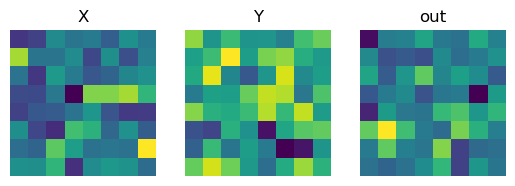

In [22]:
def get_rand_einsum_params(X, Y):
    xnd = len(X.shape)
    ynd = len(Y.shape)
    
    px = np.random.permutation(xnd)
    knd = np.random.randint(1, ynd)
    ki = tuple(np.argmax(np.random.randn(n, (ynd - knd)), axis=0))
    py = np.random.permutation(ynd)
    pk = np.random.permutation(knd)
    pout = np.random.permutation(2*k)
    
    ker = Y.transpose(*py)
    print('ks1', ker.shape)
    ker = ker[ki]
    print('ks2', ker.shape)
    print('ki', ki)
    print('knd', knd, 'len(ker.shape)', len(ker.shape))
          
    return px, pk, pout, ker

def ceinsum_v0(X, ker, C):
    """ einsum with indices paremeterized by C.
    X, ker are ndarrays with n = X.shape[i] = X.shape[j] = ker.shape[k] for all valid i,j,k.
    C is a 2d array."""

    xnd = len(X.shape)
    knd = len(ker.shape)

    ch = C.shape[0]
    px = np.argsort(np.sum(C[    0:ch//3,   0:xnd], axis=0))
    pk = np.argsort(np.sum(C[ch//3:2*ch//3, 0:knd], axis=0))
    po = np.argsort(np.sum(C[2*ch//3:, 0:xnd], axis=0))

    print('px', px)
    print('pk', pk)
    print('po', po)
    out = np.einsum(X, px, ker, pk, po)
    return out


n = 2
k = 3

X = np.random.randn(n**(2*k)).reshape(*[n for _ in range(2*k)])
Y = np.random.randn(n**(2*k)).reshape(*[n for _ in range(2*k)])

px, pk, pout, ker = get_rand_einsum_params(X, Y)

print('..... px', px)
print('..... pk', pk)
print('..... ker.s', ker.shape)

prod = np.einsum(X, px, ker, pk, pout)

out = ceinsum_v0(X, Y, X.reshape(n**k, n**k))

print(X.shape)
print(Y.shape)

fig, axs = plt.subplots(1, 3)
axs = axs.reshape(-1)
for ax in axs: ax.axis('off')
axs[0].imshow(X.reshape(n**k, n**k)); axs[0].set_title('X')
axs[1].imshow(Y.reshape(n**k, n**k)); axs[1].set_title('Y')
axs[2].imshow(out.reshape(n**k, n**k)); axs[2].set_title('out')

In [23]:
p(np.arange(8).reshape(2, 2, 2).transpose(1, 0, 2))

|+----++----+|
||0 1 ||2 3 ||
||4 5 ||6 7 ||
|+----++----+|



In [24]:
np.argmax(np.random.randn(6, 6), axis=-1)

array([5, 1, 2, 3, 3, 4])

In [25]:
np.sum(np.random.randn(4,5), axis=0).shape

(5,)

x.s (2, 2, 2, 2, 2, 2) xnd 6
y.s (2, 2, 2, 2, 2, 2) ynd 6
sh 2
px.s (6,)
po.s (6,)
py.s (6,)
knd 2
nki 4
np.sum(C[3*sh:4*sh, 0:nki], axis=0).shape (4,)
ki (0, 1, 0, 0)
pk.s [0 1]
ker.s (2, 2)
(2, 2, 2, 2, 2, 2)
(2, 2, 2, 2, 2, 2)
(2, 2, 2, 2, 2, 2)


Text(0.5, 1.0, 'out')

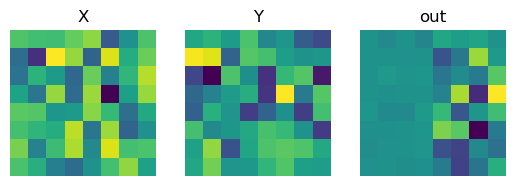

In [26]:
def ceinsum_v1(X, Y, C):
    """ einsum with indices paremeterized by C.
    X, ker are ndarrays with n = X.shape[i] = X.shape[j] = ker.shape[k] for all valid i,j,k.
    C is a 2d array."""

    xnd = len(X.shape)
    ynd = len(Y.shape)

    print('x.s', X.shape, 'xnd', xnd)
    print('y.s', Y.shape, 'ynd', ynd)

    ch = C.shape[0]
    n_samples = 4
    sh = ch // n_samples # sampling height

    print('sh', sh)

    px = np.argsort(np.sum(C[0*sh:1*sh, 0:xnd], axis=0)) # X perm
    po = np.argsort(np.sum(C[1*sh:2*sh, 0:xnd], axis=0)) # out perm
    py = np.argsort(np.sum(C[2*sh:3*sh, 0:ynd], axis=0)) # Y perm

    print('px.s', px.shape)
    print('po.s', po.shape)
    print('py.s', py.shape)

    knd = np.argmax(np.sum(C[2*sh:3*sh, 0:ynd-2])) + 2 # number of kernel dimensions
    nki = ynd - knd
    ki = tuple(np.argmax(C[3*sh:4*sh, 0:nki], axis=0)) # kernel indices
    pk = np.argsort(np.sum(C[4*sh:5*sh, 0:knd], axis=0))
    
    print('knd', knd)
    print('nki', nki)
    print('np.sum(C[3*sh:4*sh, 0:nki], axis=0).shape', np.sum(C[3*sh:4*sh, 0:nki], axis=0).shape)
    print('ki', ki)
    print('pk.s', pk)

    ker = Y.transpose(*py)[ki]
    print('ker.s', ker.shape)

    out = np.einsum(X, px, ker, pk, po)
    return out


n = 2
k = 3
X = np.random.randn(n**(2*k)).reshape(*[n for _ in range(2*k)])
Y = np.random.randn(n**(2*k)).reshape(*[n for _ in range(2*k)])
out = ceinsum_v1(X, Y, X.reshape(n**k, n**k))

print(X.shape)
print(Y.shape)
print(out.shape)


fig, axs = plt.subplots(1, 3)
axs = axs.reshape(-1)
for ax in axs: ax.axis('off')
axs[0].imshow(X.reshape(n**k, n**k)); axs[0].set_title('X')
axs[1].imshow(Y.reshape(n**k, n**k)); axs[1].set_title('Y')
axs[2].imshow(out.reshape(n**k, n**k)); axs[2].set_title('out')

a0 [2 4]
a1 [0 0 0 1 1 1 1 0 0 1]


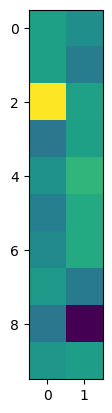

In [27]:
X = np.random.randn(10, 2)
print('a0', np.argmax(X, axis=0))
print('a1', np.argmax(X, axis=1))
plt.imshow(X)

In [28]:
a = np.random.randn(10, 10, 3)
print(np.mean(a, axis=-1).shape)

(10, 10)


In [29]:
# Example dimensions
b = 100  # number of batches
d = 4  # dimensionality of the tensor (without batch)
n = 2  # size of each dimension

# Generate a sample batched tensor X and a set of permutations P
X = np.arange(b * n**d).reshape(b, *([n] * d))
P = np.array([np.random.permutation(d) for _ in range(b)])

# Apply permutations in P to each corresponding batch in X
def batch_permute(X, P):
    # Output tensor initialized with the same shape as X
    out = np.empty_like(X)
    
    # Iterate over each batch to apply the corresponding permutation
    for i in range(b):
        out[i] = np.transpose(X[i], axes=P[i])
    
    return out

def batched_permutation_moveaxis(X, P):
    # Initialize an output array
    out = np.empty_like(X)
    
    # Apply permutations for each batch item using np.moveaxis

    id_perm = tuple(range(len(X.shape) - 1))
    for i in range(b):
        out[i] = np.moveaxis(X[i], P[i], id_perm)
    
    return out


# Execute the batched permutation
print('batch permute timing')
%timeit batch_permute(X, P)
print()
print('batch permutaiton moveaxis timing')
%timeit result2 = batched_permutation_moveaxis(X, P)

result = batch_permute(X, P)
result2 = batched_permutation_moveaxis(X, P)
print('permutation functions give the same result:', np.all(result == result2))

batch permute timing
102 μs ± 208 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

batch permutaiton moveaxis timing
275 μs ± 6.88 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
permutation functions give the same result: True


In [30]:
p(X[0].transpose(*P[0]))
p(np.moveaxis(X[0], P[0], range(len(X[0].shape))))

|+------++------+|
||0  1  ||4  5  ||
||2  3  ||6  7  ||
|+------++------+|
|+------++------+|
||8  9  ||12 13 ||
||10 11 ||14 15 ||
|+------++------+|

|+------++------+|
||0  1  ||4  5  ||
||2  3  ||6  7  ||
|+------++------+|
|+------++------+|
||8  9  ||12 13 ||
||10 11 ||14 15 ||
|+------++------+|



In [31]:
a = np.arange(5**3).reshape(5, 5, 5)

In [32]:
a[:, 2:2+1, :3].shape

(5, 1, 3)

In [33]:
a.shape

(5, 5, 5)

In [34]:
np.stack([a]*2, axis=0).shape

(2, 5, 5, 5)

In [35]:
x = np.arange(5).reshape(5, 1) + np.zeros((5, 10))
x.reshape(5, 2, 5)

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]],

       [[3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3.]],

       [[4., 4., 4., 4., 4.],
        [4., 4., 4., 4., 4.]]])

Now lets look at tensor shapes through attention computations.


k:
shape: torch.Size([2, 3, 5, 7])
dtype: torch.float32
min: tensor(-2.3927)
max: tensor(2.3262)
mean: tensor(0.0124)
std: tensor(0.9738)



Text(0.5, 1.0, 'attn(k, q, v)')

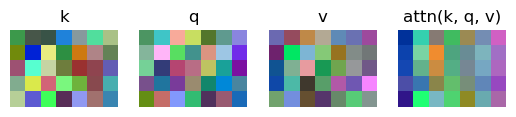

In [36]:
# Example usage
B = 5
C = 3
seq_len_k = 64
seq_len_v = 64
depth = 64

B = 2
C = 3
H = 5
W = 7

k = torch.randn(B, C, H, W)
q = torch.randn(B, C, H, W)
v = torch.randn(B, C, H, W)
attn = F.scaled_dot_product_attention(k, q, v)

fig, axs = plt.subplots(1, 4)
ax = axs.reshape(-1)
for ax in axs:
    ax.axis('off')

inspect('k', k)


axs[0].imshow(normalize(k[0].permute(1, 2, 0))); axs[0].set_title('k')
axs[1].imshow(normalize(q[0].permute(1, 2, 0))); axs[1].set_title('q')
axs[2].imshow(normalize(v[0].permute(1, 2, 0))); axs[2].set_title('v')
axs[3].imshow(normalize(attn[0].permute(1, 2, 0))); axs[3].set_title('attn(k, q, v)')


In [37]:
np.random.randn(5, 5).std()
torch.randn(4, 4).mean().to(torch.float)


tensor(0.1118)

In [38]:
torch.float is torch.float32

True

In [39]:
torch.mean(torch.randn(3, 4, 5), dim=0).unsqueeze(0).shape

torch.Size([1, 4, 5])

In [40]:
inspect('clipped', torch.clip(torch.randn(10, 10, 10), 0, 1))


clipped:
shape: torch.Size([10, 10, 10])
dtype: torch.float32
min: tensor(0.)
max: tensor(1.)
mean: tensor(0.3136)
std: tensor(0.3999)




k:
shape: torch.Size([2, 3, 4, 4])
dtype: torch.float32
min: tensor(-1.9770)
max: tensor(3.0015)
mean: tensor(-0.0555)
std: tensor(1.0402)


attn:
shape: torch.Size([2, 3, 4, 4])
dtype: torch.float32
min: tensor(-0.9765)
max: tensor(0.9681)
mean: tensor(0.0029)
std: tensor(0.3611)



Text(0.5, 1.0, 'attn(k, q, v)')

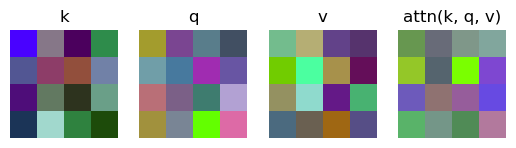

In [41]:


seq_len_k = 64
seq_len_v = 64
depth = 64

B = 2
C = 3
H = 4
W = 4

embed_dim = 16
num_heads = 4

k = torch.randn(B, C, H, W)
q = torch.randn(B, C, H, W)
v = torch.randn(B, C, H, W)

mha = torch.nn.MultiheadAttention(embed_dim, num_heads)
with torch.no_grad():
    attn, _ = mha(k.reshape(B, C, H*W), q.reshape(B, C, H*W), v.reshape(B, C, H*W))
attn = attn.reshape(B, C, H, W)


fig, axs = plt.subplots(1, 4)
ax = axs.reshape(-1)
for ax in axs:
    ax.axis('off')

inspect('k', k)
inspect('attn', attn)

axs[0].imshow(normalize(k[0].permute(1, 2, 0))); axs[0].set_title('k')
axs[1].imshow(normalize(q[0].permute(1, 2, 0))); axs[1].set_title('q')
axs[2].imshow(normalize(v[0].permute(1, 2, 0))); axs[2].set_title('v')
axs[3].imshow(normalize(attn[0].permute(1, 2, 0))); axs[3].set_title('attn(k, q, v)')


In [42]:
(1, 2) == (1, 2)

True

In [43]:
import networkx as nx

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{0: {}}
[(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 9), (1, 0), (2, 0), (2, 3), (2, 4), (3, 0), (3, 2), (3, 4), (3, 7), (3, 8), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 0), (5, 4), (5, 9), (6, 0), (6, 4), (6, 8), (7, 3), (7, 4), (8, 3), (8, 6), (9, 0), (9, 5)]
edges into 1: [(0, 1)]


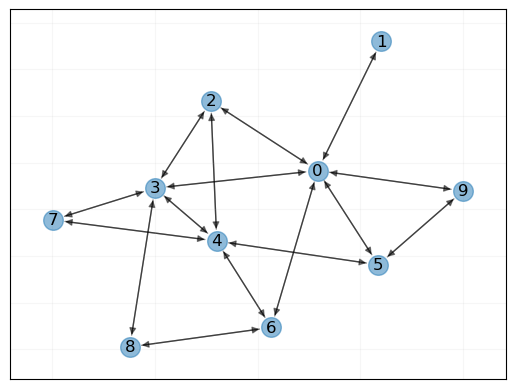

In [44]:
g = nx.DiGraph(nx.barabasi_albert_graph(10, 2))
plot(g)
# for edge in g.adj: # ():
    # print(edge)
print(g.nodes)
print(g[1])
print(g.edges)
print('edges into 1:', g.in_edges(1))

In [45]:
torch.sin(torch.Tensor([2334]))

tensor([0.2019])

In [46]:
""" lets iterate attn. see what happens. """
# Example usage
B = 5
C = 3
H = 9
W = 9

k = torch.randn(C, H, W)
q = torch.randn(C, H, W)
v = torch.randn(C, H, W)
attn = F.scaled_dot_product_attention(k, q, v)
mha = torch.nn.MultiheadAttention(embed_dim=H*W, num_heads=C)

ims = [k, q, v]

for _ in range(10):
    ik, iq, iv = torch.randint(0, len(ims), size=(3,))
    ims.append(
        F.scaled_dot_product_attention(
            ims[-1],
            ims[iq],
            ims[iv],
        )
    )

def torch2np(im):
    if len(im.shape) == 4:
        return im.detach().permute(0, 2, 3, 1).cpu().numpy()
    if len(im.shape) == 3:
        return im.detach().permute(1, 2, 0).cpu().numpy()
    if len(im.shape) == 1:
        return im.detach().cpu().numpy()
    else:
        inspect('im', im)
        raise Exception

media.show_images([normalize(torch2np(im)) for im in ims], height=100, border=True)

,,,,,,,,,,,,


In [47]:
g = nx.path_graph(4)
print(g.edges)

[(0, 1), (1, 2), (2, 3)]


In [48]:
B = 3
C = 3
H = 3
W = 3
x = torch.randn(B, C, H, W)
dist = torch.distributions.categorical.Categorical(logits=x)
dist.sample()

tensor([[[0, 2, 1],
         [0, 0, 0],
         [0, 1, 2]],

        [[1, 2, 0],
         [0, 2, 2],
         [2, 1, 1]],

        [[2, 0, 2],
         [0, 2, 2],
         [0, 1, 1]]])

In [49]:
x = torch.arange(B*C*H*W).reshape(B, C, H, W)
p(x.permute(0, 2, 1, 3).numpy())

|+---------++---------++---------+|
||0  1  2  ||3  4  5  ||6  7  8  ||
||9  10 11 ||12 13 14 ||15 16 17 ||
||18 19 20 ||21 22 23 ||24 25 26 ||
|+---------++---------++---------+|
|+---------++---------++---------+|
||27 28 29 ||30 31 32 ||33 34 35 ||
||36 37 38 ||39 40 41 ||42 43 44 ||
||45 46 47 ||48 49 50 ||51 52 53 ||
|+---------++---------++---------+|
|+---------++---------++---------+|
||54 55 56 ||57 58 59 ||60 61 62 ||
||63 64 65 ||66 67 68 ||69 70 71 ||
||72 73 74 ||75 76 77 ||78 79 80 ||
|+---------++---------++---------+|



In [50]:
B = 5
C = 3
H = 8
W = 8
x = torch.randn(B, C, H, W)

show_tensor(x)
show_tensor(F.interpolate(x, size=(20, 20)))

,,,,


,,,,


In [51]:
wei = torch.ones(2, 3, 5) * torch.arange(2).reshape(2, 1, 1)
print(wei)

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


In [52]:
N = 2
B = 3
C = 5
H = 7
W = 11
state = torch.randn(N, B, C, H, W)
idxs = torch.argmax(torch.rand(B, N, N), dim=1)

inspect('state', state)
inspect('idxs', idxs)

inspect('s[i]', state[idxs.permute(1, 0)])


state:
shape: torch.Size([2, 3, 5, 7, 11])
dtype: torch.float32
min: tensor(-2.8996)
max: tensor(3.9682)
mean: tensor(0.0128)
std: tensor(0.9739)


idxs:
shape: torch.Size([3, 2])
dtype: torch.int64
min: tensor(0)
max: tensor(1)


s[i]:
shape: torch.Size([2, 3, 3, 5, 7, 11])
dtype: torch.float32
min: tensor(-2.8996)
max: tensor(3.9682)
mean: tensor(0.0087)
std: tensor(0.9626)



In [53]:
s = torch.randn(B, N, C)
i = torch.argmax(torch.randn(B, N, N), dim=1)

inspect('s', s)
inspect('i', i)
print('i', i)
inspect('s[i]', s[i[:, 0]])


s:
shape: torch.Size([3, 2, 5])
dtype: torch.float32
min: tensor(-2.8429)
max: tensor(1.4826)
mean: tensor(-0.0397)
std: tensor(1.1149)


i:
shape: torch.Size([3, 2])
dtype: torch.int64
min: tensor(0)
max: tensor(1)

i tensor([[1, 1],
        [1, 1],
        [1, 0]])

s[i]:
shape: torch.Size([3, 2, 5])
dtype: torch.float32
min: tensor(-2.8429)
max: tensor(1.4787)
mean: tensor(-0.3483)
std: tensor(1.2533)



In [54]:
N = 2
B = 3
C = 5
H = 7
W = 11

s = torch.randn(B, N, C, H, W)
i = torch.argmax(torch.randn(B, N, N), dim=1)

inspect('s', s)
inspect('i', i)
print(i)

batch_idxs = torch.arange(B).unsqueeze(-1).expand(B, N)
inspect('bi', batch_idxs)
p(batch_idxs)
sbi = s[batch_idxs, i]

inspect('s[batch_idxs, i]', sbi)

print(all(
    [torch.all(sbi[b, n] == s[b, i[b, n]])
      for n in range(N) for b in range(B)
    ]
))


s:
shape: torch.Size([3, 2, 5, 7, 11])
dtype: torch.float32
min: tensor(-3.7092)
max: tensor(3.8363)
mean: tensor(-0.0044)
std: tensor(0.9901)


i:
shape: torch.Size([3, 2])
dtype: torch.int64
min: tensor(0)
max: tensor(1)

tensor([[0, 1],
        [1, 1],
        [0, 1]])

bi:
shape: torch.Size([3, 2])
dtype: torch.int64
min: tensor(0)
max: tensor(2)

+----+
|0 0 |
|1 1 |
|2 2 |
+----+


s[batch_idxs, i]:
shape: torch.Size([3, 2, 5, 7, 11])
dtype: torch.float32
min: tensor(-3.7092)
max: tensor(3.8363)
mean: tensor(0.0053)
std: tensor(1.0042)

True


In [55]:
N = 2
B = 3
C = 5
H = 7
W = 11

s = torch.randn(N, B, C, H, W)

# (N, B, ...) -> (B, N, ...)
s = s.transpose(0, 1)

i = torch.argmax(torch.randn(B, N, N), dim=1)

inspect('s', s)
inspect('i', i)
print(i)

batch_idxs = torch.arange(B).unsqueeze(-1).expand(B, N)
inspect('bi', batch_idxs)
p(batch_idxs)
sbi = s[batch_idxs, i]


inspect('s[batch_idxs, i]', sbi)

# (B, N, ...) -> (N, B, ...)
sbi = sbi.transpose(0, 1)
s = s.transpose(0, 1)

print(all(
    [torch.all(sbi[n, b] == s[i[b, n], b])
      for n in range(N) for b in range(B)
    ]
))


s:
shape: torch.Size([3, 2, 5, 7, 11])
dtype: torch.float32
min: tensor(-3.4579)
max: tensor(3.8220)
mean: tensor(0.0006)
std: tensor(1.0234)


i:
shape: torch.Size([3, 2])
dtype: torch.int64
min: tensor(0)
max: tensor(1)

tensor([[1, 0],
        [0, 1],
        [1, 1]])

bi:
shape: torch.Size([3, 2])
dtype: torch.int64
min: tensor(0)
max: tensor(2)

+----+
|0 0 |
|1 1 |
|2 2 |
+----+


s[batch_idxs, i]:
shape: torch.Size([3, 2, 5, 7, 11])
dtype: torch.float32
min: tensor(-3.4579)
max: tensor(3.8220)
mean: tensor(-0.0029)
std: tensor(1.0142)

True


In [56]:
torch.randn(1, 2, 3, 4, 5).transpose(1, 0).shape

torch.Size([2, 1, 3, 4, 5])

In [60]:
x = torch.randn(N, N)
w = torch.randn(N, N)
xw = x @ w

inspect('x', x)
inspect('w', w)
inspect('xw', xw)


x:
shape: torch.Size([2, 2])
dtype: torch.float32
min: tensor(-1.7147)
max: tensor(0.8447)
mean: tensor(-0.7687)
std: tensor(1.1823)


w:
shape: torch.Size([2, 2])
dtype: torch.float32
min: tensor(-0.4489)
max: tensor(0.9945)
mean: tensor(0.1763)
std: tensor(0.6439)


xw:
shape: torch.Size([2, 2])
dtype: torch.float32
min: tensor(-1.2245)
max: tensor(0.1870)
mean: tensor(-0.6076)
std: tensor(0.5900)



In [61]:
x = torch.randn(B, N, N)
w = torch.randn(B, N, N)
xw = x @ w

inspect('x', x)
inspect('w', w)
inspect('xw', xw)


x:
shape: torch.Size([3, 2, 2])
dtype: torch.float32
min: tensor(-0.9569)
max: tensor(2.3480)
mean: tensor(0.4151)
std: tensor(1.0305)


w:
shape: torch.Size([3, 2, 2])
dtype: torch.float32
min: tensor(-2.2597)
max: tensor(1.9041)
mean: tensor(-0.1709)
std: tensor(1.1051)


xw:
shape: torch.Size([3, 2, 2])
dtype: torch.float32
min: tensor(-2.4579)
max: tensor(1.2140)
mean: tensor(-0.0017)
std: tensor(0.9919)



In [62]:
x = torch.randn(B, N, N)
w = torch.randn(N, N)
xw = x @ w

inspect('x', x)
inspect('w', w)
inspect('xw', xw)


x:
shape: torch.Size([3, 2, 2])
dtype: torch.float32
min: tensor(-1.8974)
max: tensor(1.8213)
mean: tensor(0.0564)
std: tensor(1.1763)


w:
shape: torch.Size([2, 2])
dtype: torch.float32
min: tensor(-2.0387)
max: tensor(1.7997)
mean: tensor(-0.7535)
std: tensor(1.7641)


xw:
shape: torch.Size([3, 2, 2])
dtype: torch.float32
min: tensor(-4.5779)
max: tensor(4.7847)
mean: tensor(-0.0604)
std: tensor(2.8788)



In [63]:
# for x: (N, B, C, H, W), w: (B, N, N)

N = 2
B = 3
C = 5
H = 7
W = 11

def mmv1(x, w):
    perm = (2, 3, 4, 1, 0)
    x = x.permute(*perm).unsqueeze(-2)
    xw = (x @ w).squeeze(-2).permute(*inv_p(perm))
    return xw

def mmv2(x, w):
    xw = []
    for b in range(B):
        xb = x[:, b]
        wb = w[b]
        xwb = (xb.transpose(0, -1) @ wb).transpose(0, -1)
        xw.append(xwb)
    return torch.stack(xw, dim=0).transpose(0, 1)

def bmm1(x, w):
    return torch.bmm(
        x.reshape(N, B, -1).permute(1, 2, 0),
        w
    ).permute(2, 0, 1).reshape(*x.shape)

     
def bmm2(x, w):
    x = x.transpose(0, 1)
    B, N, C, H, W = x.shape
    x = x.reshape(B, N, -1)
    return torch.bmm(
        w.transpose(-1, -2),
        x
    ).reshape(B, N, C, H, W).transpose(0, 1)
    
# bxw = torch.bmm(x.reshape(B, N, -1), w)

x = torch.randn(N, B, C, H, W)
w = torch.randn(B, N, N)

xw1 = mmv1(x, w)
xw2 = mmv2(x, w)
xw3 = bmm1(x, w)
xw4 = bmm2(x, w)

inspect('x', x)
inspect('w', w)
inspect('xw1', xw1)
inspect('xw2', xw2)

print(torch.allclose(xw1, xw2))
print(torch.allclose(xw1, xw3))
print(torch.allclose(xw1, xw4))


x:
shape: torch.Size([2, 3, 5, 7, 11])
dtype: torch.float32
min: tensor(-3.5696)
max: tensor(3.2304)
mean: tensor(-0.0273)
std: tensor(1.0177)


w:
shape: torch.Size([3, 2, 2])
dtype: torch.float32
min: tensor(-2.3218)
max: tensor(1.3325)
mean: tensor(-0.0504)
std: tensor(0.9641)


xw1:
shape: torch.Size([2, 3, 5, 7, 11])
dtype: torch.float32
min: tensor(-8.7653)
max: tensor(7.6058)
mean: tensor(0.0161)
std: tensor(1.2840)


xw2:
shape: torch.Size([2, 3, 5, 7, 11])
dtype: torch.float32
min: tensor(-8.7653)
max: tensor(7.6058)
mean: tensor(0.0161)
std: tensor(1.2840)

True
True
True


In [64]:
N = 2
B = 3
C = 5
H = 7
W = 11

# torch.randn(C, H, W) @ torch.randn(W, H, N, B, C)

In [65]:
(torch.randn(1,2,3,4,5) @ torch.randn(5, 5)).shape

torch.Size([1, 2, 3, 4, 5])

In [66]:
N = 10
B = 25
C = 5
H = 7
W = 11


x = torch.randn(N, B, C, H, W)
w = torch.randn(B, N, N)
%timeit mmv1(x, w)
%timeit bmm1(x, w)
%timeit bmm2(x, w)

315 μs ± 8.71 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.78 ms ± 9.58 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
79.9 μs ± 237 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
61.8 μs ± 87.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [70]:
N = 10
B = 25
C = 5
H = 7
W = 11


x = torch.randn(N, B, C, H, W)

(x @ x.transpose(-1, -2)).shape

torch.Size([10, 25, 5, 7, 7])

In [82]:
F.interpolate(torch.randn(B, 1, H, W), size=(N, N)).squeeze(1).shape

torch.Size([25, 10, 10])

In [83]:
x = torch.randn(N, B, C, H, W)

torch.stack([x[:, 0], x[:, 1]], dim=1).shape

torch.Size([10, 2, 5, 7, 11])

In [84]:
x = torch.randn(B, C, H, W)
y = torch.randn(1, C, H, W)

In [90]:
F.mse_loss(x, y.expand(B, C, H, W), reduction='none').shape

torch.Size([4, 3, 32, 32])

In [92]:
import torch
import torch.nn.functional as F

# Example input tensors
B, C, H, W = 4, 3, 32, 32
x = torch.randn(B, C, H, W)
y = torch.randn(1, C, H, W)  # Shape (1, C, H, W)

# Compute per-element MSE loss
loss = F.mse_loss(x, y.expand(B, C, H, W), reduction='none')  # Shape: (B, C, H, W)
inspect('loss', loss)
# Optionally, reduce across spatial dimensions and channels for each batch
loss_per_batch = loss.mean(dim=(1, 2, 3))  # Shape: (B,)
inspect('loss_per_batch', loss_per_batch)


loss:
shape: torch.Size([4, 3, 32, 32])
dtype: torch.float32
min: tensor(2.0198e-09)
max: tensor(28.5907)
mean: tensor(2.0470)
std: tensor(2.9294)


loss_per_batch:
shape: torch.Size([4])
dtype: torch.float32
min: tensor(1.9782)
max: tensor(2.1044)
mean: tensor(2.0470)
std: tensor(0.0582)



In [93]:
x = torch.randn(3, C, H, W)
x.repeat(9, C, H, W).shape

torch.Size([27, 9, 1024, 1024])

In [94]:
B = 12
k = 3
torch.linspace(0, 1, B // k).reshape(-1, 1).expand(B // k, k).reshape(-1)

tensor([0.0000, 0.0000, 0.0000, 0.3333, 0.3333, 0.3333, 0.6667, 0.6667, 0.6667,
        1.0000, 1.0000, 1.0000])

In [95]:
torch.arange(4).reshape(-1, 1).expand(4, 16).reshape(-1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [102]:
x = torch.arange(2*3).reshape(2, 3)
x


tensor([[0, 1, 2],
        [3, 4, 5]])

In [103]:
x.shape

torch.Size([2, 3])

In [109]:
x.expand(2, 3).shape

torch.Size([2, 3])

In [152]:
N = 4
B = 1
C = 1
H = 8
W = 8

topk = 1
max_noise_scale = 0

state = torch.randn(N, B, C, H, W)
ranking = torch.argsort(torch.randn(B))
keepers = state[:, ranking[:topk]]

noise_scale = torch.linspace(0, 1, B // topk).reshape(-1, 1).expand(B // k, k).reshape(-1)
noise_scale = noise_scale.reshape(1, -1, 1, 1, 1)
noise_scale = noise_scale * max_noise_scale
noise = torch.randn_like(state)
# print(noise)

new_state = keepers + noise
print(torch.all(new_state == state))
print(torch.all(keepers == state))

tensor(False)
tensor(True)


In [183]:
N = 4
B = 1
C = 1
H = 8
W = 8

x = torch.randn(N, B, C, H, W, dtype=torch.cfloat)

print(x.shape)
print(torch.view_as_real(x).shape)
print(x.abs().shape)

torch.Size([4, 1, 1, 8, 8])
torch.Size([4, 1, 1, 8, 8, 2])
torch.Size([4, 1, 1, 8, 8])


In [192]:
N = 4
B = 1
C = 1
H = 8
W = 8

x = torch.randn(N, B, C, H, W, dtype=torch.cfloat)
y = torch.randn(N, B, C, H, W, dtype=torch.float)

z = x + y

print(x.shape)
print(y.shape)

print(z.shape)
print(z.dtype)

torch.Size([4, 1, 1, 8, 8])
torch.Size([4, 1, 1, 8, 8])
torch.Size([4, 1, 1, 8, 8])
torch.complex64


In [201]:
N = 2
B = 1
C = 1
H = 3
W = 3

x = torch.randn(N, B, C, H, W, dtype=torch.cfloat)
print(x)

print((x / x.abs()).abs())

tensor([[[[[ 4.8092e-01+0.2164j, -4.2509e-01-0.2464j, -8.0848e-01-0.3206j],
           [ 1.0036e+00-0.6567j,  4.4936e-01-0.9887j, -2.5919e-01-0.0090j],
           [-5.5506e-01+0.2511j, -9.3600e-01+0.6882j,  1.0938e-01-0.0077j]]]],



        [[[[-9.8586e-02-0.8808j,  7.5027e-01+0.2481j,  1.5126e+00-0.1608j],
           [ 9.3896e-02-0.3777j,  4.1450e-01-0.6089j, -3.3092e-02-0.2923j],
           [-6.2461e-01+0.4673j, -1.4876e-03-0.0791j, -2.2545e-01-0.7805j]]]]])
tensor([[[[[1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000]]]],



        [[[[1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000],
           [1.0000, 1.0000, 1.0000]]]]])
